In [2]:
import importlib

import ase.io as aio
from ase.units import Bohr
import numpy as np
import glob
import pandas as pd

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import bt_tools as bt
importlib.reload(bt)

import utils_qm as uqm

from matplotlib import pyplot as plt

def ref_scatter(ref):
    return(np.linspace(np.amin(ref), np.amax(ref), 3))


    
r2 = lambda y_r, y_f: ((y_f-y_r.mean())**2).sum()/((y_r-y_r.mean())**2).sum()

from sklearn.metrics import r2_score



In [3]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/all_energies.csv')

In [4]:
data_2 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['bfe type'] = 'homo'

In [5]:
def model_dbar(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
        
        if Z1 >= 6 and Z1 <= 9:
            y = -beta2**2*(Z1**(7/3)+Z2**(7/3))-alpha2**2-(b_prime**2+1/dbar2**2)*Z1*Z2
        elif Z1 >= 14 and Z1 <= 17:
            y = -beta3**2*(Z1**(7/3)+Z2**(7/3))-alpha3**2-(b_prime**2+1/dbar3**2)*Z1*Z2
        elif Z1 >= 32 and Z1 <= 35:
            y = -beta4**2*(Z1**(7/3)+Z2**(7/3))-alpha4**2-(b_prime**2+1/dbar4**2)*Z1*Z2
        y_vec.append(y)

    return(y_vec)

def model_dbar_ari(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
        
#         if Z1 >= 6 and Z1 <= 9:
#             y = -beta2**2*(Z1**(7/3)+Z2**(7/3))+alpha2-(b_prime**2+1/dbar2**2)*Z1*Z2
#         elif Z1 >= 14 and Z1 <= 17:
#             y = -beta3**2*(Z1**(7/3)+Z2**(7/3))+alpha3-(b_prime**2+1/dbar3**2)*Z1*Z2
#         elif Z1 >= 32 and Z1 <= 35:
#             y = -beta4**2*(Z1**(7/3)+Z2**(7/3))+alpha4-(b_prime**2+1/dbar4**2)*Z1*Z2
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha = (np.abs(alpha_1)+np.abs(alpha_2))/2
        beta = (np.abs(beta_1)+np.abs(beta_2))/2
        dbar = (np.abs(dbar_1)+np.abs(dbar_2))/2
        
        y = -beta**2*(Z1**(7/3)+Z2**(7/3))-alpha-(b_prime**2+1/dbar**2)*Z1*Z2 
        
        y_vec.append(y)

    return(y_vec)

def model_dbar_geo(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha = np.sqrt(alpha_1**2*alpha_2**2)
        beta = np.sqrt(beta_1**2*beta_2**2)
        dbar = np.sqrt(dbar_1**2*dbar_2**2)
        
        y = -beta*(Z1**(7/3)+Z2**(7/3))-alpha-(b_prime**2+1/dbar)*Z1*Z2 
        
        y_vec.append(y)

    return(y_vec)

def model_mixed(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:11]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha_term = -(alpha_1**2 + alpha_2**2)/2
        
        beta_term = -(beta_1**2*Z1**(7/3) + beta_2**2*Z2**(7/3))
        
        dbar_term = -(1/dbar_1**2 + 1/dbar_2**2)/2*Z1*Z2
        
        b_prime_term = -b_prime*Z1*Z2
        
        y = alpha_term + beta_term + dbar_term + b_prime_term
        
        y_vec.append(y)

    return(y_vec)

def model_mixed_beta(*args):
    globals()['model_dbar_lat'] = args[1:]
    var = args[0]
    alpha2, beta2, dbar2, alpha3, beta3, dbar3, alpha4, beta4, dbar4, b_prime = args[1:]
    y_vec = []
    for x in var:
        Z1, Z2= x[0], x[1]
            
        if Z1 >= 6 and Z1 <= 9:
            alpha_1 = alpha2
            beta_1 = beta2
            dbar_1 = dbar2
        elif Z1 >= 14 and Z1 <= 17:
            alpha_1 = alpha3
            beta_1 = beta3
            dbar_1 = dbar3
        elif Z1 >= 32 and Z1 <= 35:
            alpha_1 = alpha4
            beta_1 = beta4
            dbar_1 = dbar4
            
        if Z2 >= 6 and Z2 <= 9:
            alpha_2 = alpha2
            beta_2 = beta2
            dbar_2 = dbar2
        elif Z2 >= 14 and Z2 <= 17:
            alpha_2 = alpha3
            beta_2 = beta3
            dbar_2 = dbar3
        elif Z2 >= 32 and Z2 <= 35:
            alpha_2 = alpha4
            beta_2 = beta4
            dbar_2 = dbar4
            
        alpha_term = -(alpha_1**2 + alpha_2**2)/2
        
        beta_term = -(beta_1**2*Z1**(7/3) + beta_2**2*Z2**(7/3))
        
        y = alpha_term + beta_term
        
        y_vec.append(y)

    return(y_vec)

In [6]:
# initial guess for parameters
b2 = bt.BDE_clean.fromdict(data_2)
b3 = bt.BDE_clean.fromdict(data_3)
b4 = bt.BDE_clean.fromdict(data_4)


for b in [b2, b3, b4]:
    b.fit(model_dbar, [1]*10)
    print(b.mae*630)
    
b_prime_ini = (b2.params[0][-1]+b3.params[0][-1]+b4.params[0][-1])/3
alpha2, beta2, dbar2 = b2.params[0][0], b2.params[0][1], b2.params[0][2]
alpha3, beta3, dbar3 = b3.params[0][3], b3.params[0][4], b3.params[0][5]
alpha4, beta4, dbar4 = b4.params[0][6], b4.params[0][7], b4.params[0][8]

dbar2_ini = 4
dbar3_ini = 4
dbar4_ini = 4

p0 = [alpha2, beta2, dbar2_ini, alpha3, beta3, dbar3_ini, alpha4, beta4, dbar4_ini, b_prime_ini]

0.9976117210011831
2.346640219064575
2.1722878445866733


/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
b_global = bt.BDE_clean.fromdict(data_234)
b_global.fit(model_dbar, p0)
data_234_shuffled = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].sample(frac=1).to_dict('list')
data_234_shuffled['bfe type'] = 'homo'
b_global_sh = bt.BDE_clean.fromdict(data_234_shuffled)
b_global_sh.fit(model_dbar, p0)
print(b_global_sh.mae*630)

1.8388613042921071


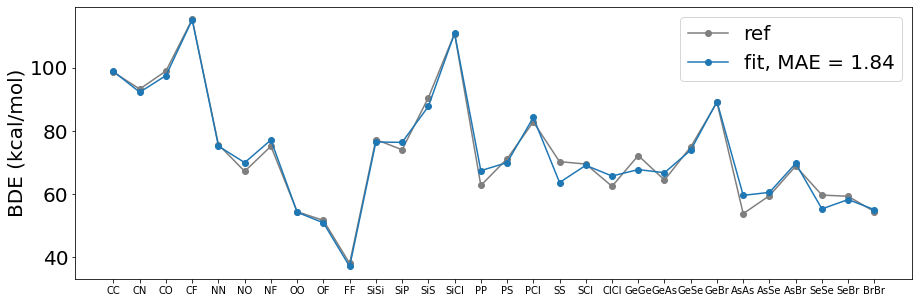

In [8]:
comp_names = []
for els in [['C', 'N', 'O', 'F'], ['Si', 'P', 'S', 'Cl'], ['Ge', 'As', 'Se', 'Br']]:
    for i in range(4):
        for j in range(i, 4):
            comp_names.append(f'{els[i]}{els[j]}')
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [15,5]

plt.plot(comp_names, b_global.bde*630, '-o',label = 'ref', color = 'tab:grey')
plt.plot(b_global.bde_fitted*630, '-o', label = f"fit, MAE = {np.round(b_global.mae*630, 2)}")

plt.xticks(fontsize=10)
plt.ylabel('BDE (kcal/mol)')

plt.legend()

In [9]:
b_global_sh.mae*630

1.8388613042921071

In [10]:
p_gamma = p0.copy()
p_gamma.append(np.sqrt(7/3))

In [30]:
p0

array([0.58519201, 0.05615728, 4.        , 0.78953269, 0.04872337,
       4.        , 1.32691723, 0.03592518, 4.        , 0.37126436])

In [29]:
p0 = [alpha2, beta2, dbar2_ini, alpha3, beta3, dbar3_ini, alpha4, beta4, dbar4_ini, b_prime_ini]

p0 = np.array(p0)
# p0[beta_ind] = 1
# p0[:] = 1

datadict = data.to_dict('list')
datadict['bfe type'] = 'homo'
b_mixed = bt.BDE_clean.fromdict(datadict)
# b_mixed = bt.BDE_clean.fromdict(data_234)

b_mixed.fit(model_mixed, p0)
# b_mixed.fit(model_mixed_beta, p0)

# b_mixed.fit(model_mixed, p_gamma)

print(f'MAE = {b_mixed.mae*630} kcal/mol')

MAE = 13.394669167532331 kcal/mol


/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, '$E_{\\rm{AB}}$ fit (kcal/mol)')

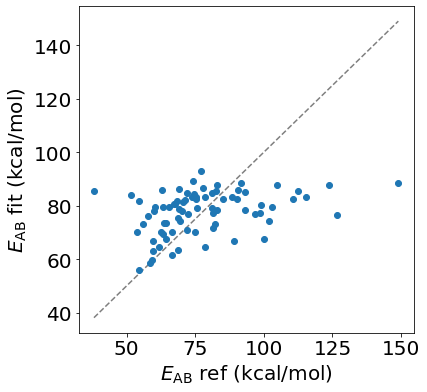

In [14]:
plt.rcParams['figure.figsize'] = [6,6]
plt.plot(ref_scatter(b_mixed.bde)*630, ref_scatter(b_mixed.bde)*630, '--', color='tab:grey')
plt.plot(b_mixed.bde*630, b_mixed.bde_fitted*630, 'o')
plt.xlabel(r'$E_{\rm{AB}}$ ref (kcal/mol)')
plt.ylabel(r'$E_{\rm{AB}}$ fit (kcal/mol)')

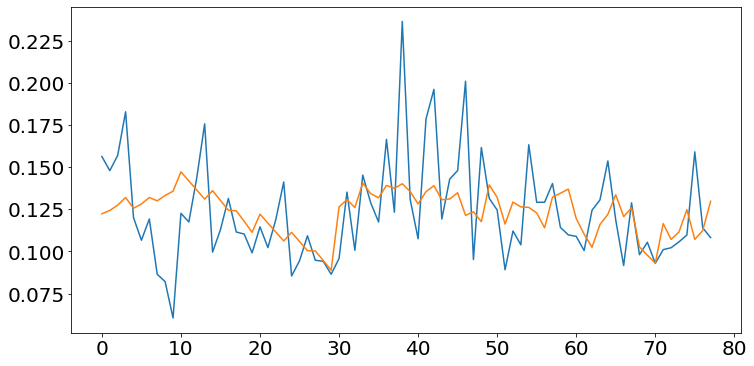

In [15]:
plt.rcParams['figure.figsize'] = [12,6]

plt.plot(b_mixed.bde)
plt.plot(b_mixed.bde_fitted)
# plt.plot(b_mixed_geo.bde_fitted)

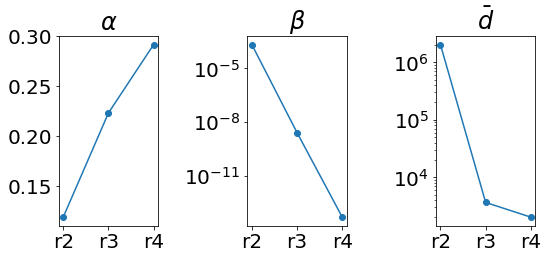

In [16]:
alpha_ind = np.array([0, 3, 6])
beta_ind = alpha_ind + 1
dbar_ind = alpha_ind + 2

xname = ['r2', 'r3', 'r4']

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [8,4]
fig, ax = plt.subplots(1,3)
for b in [b_mixed]:

    ax[0].plot(xname, b.params[0][alpha_ind]**2, '-o')
    ax[1].plot(xname, b.params[0][beta_ind]**2, '-o')
    ax[1].set_yscale('log')
    ax[2].plot(xname, b.params[0][dbar_ind]**2, '-o')
    ax[2].set_yscale('log')

ylabels = [r'$\alpha$ (kcal/mol)', r'$\beta$', r'$\bar{d}$']
for i, t in enumerate([r'$\alpha$', r'$\beta$', r'$\bar{d}$']):
    ax[i].set_title(t)
#     ax[i].set_ylabel(ylabels[i])
fig.tight_layout()

In [17]:
# unique_Z1 = 
# unique_Z2 = 
unique_Z = np.sort(np.unique(np.concatenate((b_mixed.Z1, b_mixed.Z2))))
index_a = dict(zip(unique_Z, np.arange(len(unique_Z))))
index_b = dict(zip(unique_Z, np.arange(len(unique_Z), 2*len(unique_Z))))

In [18]:
coeff_mat = np.zeros((len(b_mixed.ebfe), 2*len(unique_Z))) # there are two parameters for every element

In [19]:
coeff_mat.shape

(78, 24)

In [20]:
for row, Z1, Z2 in zip(range(len(b_mixed.Z1)), b_mixed.Z1, b_mixed.Z2):
    # coefficients for Z1
    coeff_mat[row, index_a[Z1]] += 1
    coeff_mat[row, index_b[Z1]] += Z2
    # coefficients for Z2
    coeff_mat[row, index_a[Z2]] += 1
    coeff_mat[row, index_b[Z2]] += Z1
    

In [21]:
coeff_mat[-2]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0., 35.,  0.,  0.,  0.,  0.,  0., 15.])

In [22]:
b_mixed = bt.BDE_clean.fromdict(datadict)
# b_mixed = bt.BDE_clean.fromdict(data_234)

b_mixed.linear_fit()

In [23]:
b_mixed.linear_mae*630

9.887231181562077

In [24]:
b_mixed.get_coeff_mat().shape

(78, 24)

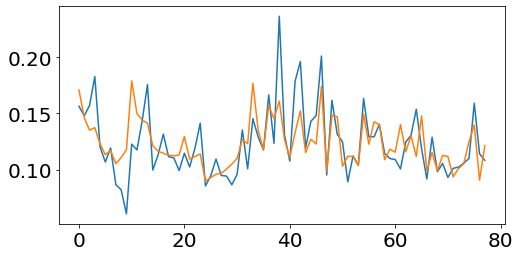

In [25]:
plt.plot(b_mixed.bde)
plt.plot(b_mixed.bde_fitted)

Text(0, 0.5, '$E_{\\rm{AB}}$ fit (kcal/mol)')

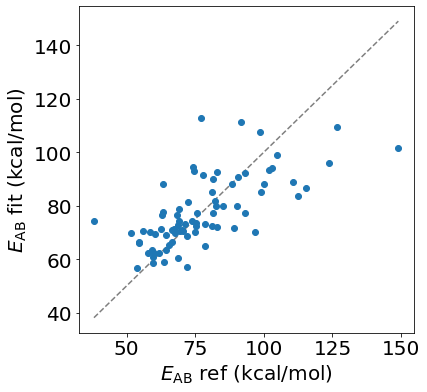

In [26]:
plt.rcParams['figure.figsize'] = [6,6]
plt.plot(ref_scatter(b_mixed.bde)*630, ref_scatter(b_mixed.bde)*630, '--', color='tab:grey')
plt.plot(b_mixed.bde*630, b_mixed.bde_fitted*630, 'o')
plt.xlabel(r'$E_{\rm{AB}}$ ref (kcal/mol)')
plt.ylabel(r'$E_{\rm{AB}}$ fit (kcal/mol)')

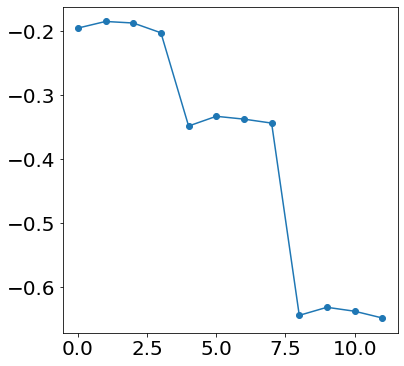

In [27]:
plt.plot(b_mixed.linear_params[:12], '-o')

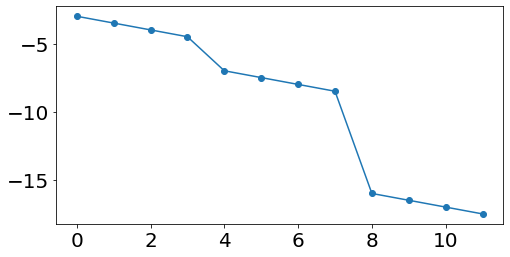

In [36]:
plt.plot(b_mixed.linear_params[12:], '-o')

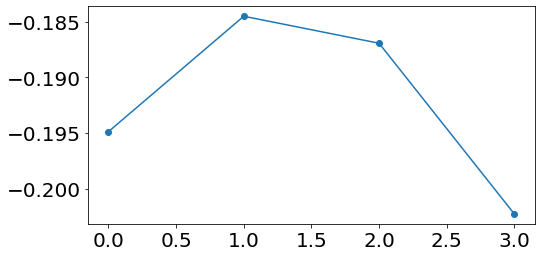

In [37]:
plt.plot(b_mixed.linear_params[:4], '-o')

/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

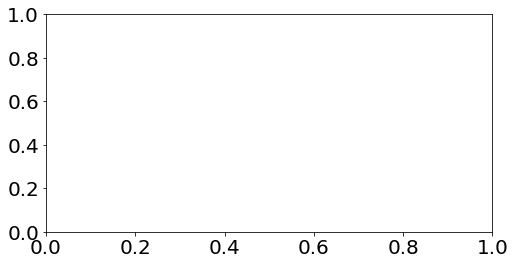

In [40]:
plt.plot((b_mixed.Z2[:4]**(2), b_mixed.linear_params[:4], 'o'))

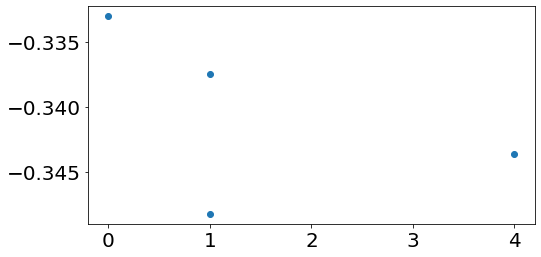

In [39]:
n = np.array([14, 15, 16, 17])
plt.plot((n-15)**2, b_mixed.linear_params[4:8], 'o')